
# Model Selection

In the past two sections, we've covered quite a bit of ground in our understanding of Stochastic Block Models. We introduced the Structured Independent Edge Model, a generalization of the Stochastic Block Model that allows us to compare probabilities of various edge clusters in the network. Next, we introduced the community detection problem, and showed how the adjacency spectal embedding coupled with various adjustments of unsupervised clustering techniques allowed us to learn estimated community assignments $\vec z$ fo the nodes of the network. We then learned how we can use these community assignments to produce estimates of the block matrix, $\hat B$, so that we have a useful model of the network.

As we have learned over the course of the book so far, one of our core aims in machine learning is to identify the *simplest* model that maintains a *faithful* representation of the underlying data with which we are presented. Imagine we toss two identical fair coins $20$ times and $10$ times respectively, which each have $p_1 = p_2 = p = 0.5$ (the probability of landing on heads, $0.5$, is identical to the probability of landing on tails). The first coin lands on heads $11$ times out of $20$ flips, and the second coin lands on heads $4$ times. In truth, these coins are identical; we simply, by chance, produced estimates $\hat p_1 = \frac{11}{20} = 0.55$ and $\hat p_2 = \frac{4}{10} = 0.4$. In reality, the best estimate of $\hat p$, the true probability, would be to *pool* across the two samples, which would give us that $\hat p = \frac{15}{30} = 0.5$. The problem here is, when we have a real sample of data, we *don't know* that $p_1 = p_2$. As we learned in the preceding section, we can derive hypotheses tests where $H_0: p_1 = p_2$ against $H_a: p_1 = p_2$, and we can simply test these hypotheses directly. Let's say we didn't flip two coins, however. Let's say we flipped three coins, where in reality $p_1 = p_2 = 0.5$, and $p_3 = 0.4$. We need to build upon our two-sample hypothesis testing strategies in order to produce ideal inference about the relationships between $p_1$, $p_2$, and $p_3$. To answer these sorts of questions, we turn to *model selection*. 

**Model selection** is the task of presenting several possible statistical models which we think describe our sample and using quantitative strategies to determine which statistical models are best supported by the samples with which we are presented. In our coin flip example with three coins where $p_1$ and $p_2$ are equal but $p_3$ is diffferent, this means that we use the sample to determine reasonable statistical models that could be possible. In the context of coin flipping experiments, the statistical models are delineated by the types of coins that could have reasonably been used for the experiment. For instance, we might propose a statistical model where $p_1 = p_2 = p_3$, another model where $p_1 = p_2$ but $p_3$ does not equal $p_1$ nor $p_2$, and a third model where $p_1$, $p_2$, and $p_3$ were all different. As an observer, you might say, this subset of three possible statistical model misses quite a few possibilities! There is another possible model where $p_2 = p_3$ but $p_1$ does not equal $p_2$ nor $p_3$, and another where $p_1 = p_3$ but $p_2$ does not equal $p_1$ nor $p_3$. Each of these models has a corresponding hypothesis under which the model is "correct". When we actually want to select the bests model, however, we will use the fact a specific property of the hypotheses we actually chose, the fact that they are *sequentially nested*, to identify the best statistical model supported by the sample. 

## Sequentially nested hypotheses allow us to choose the best hypothesis from the candidates

Let's formalize this situation a little bit more. We have the following three hypotheses. $H_0: p_1 = p_2 = p_3 = a$, against $H_1: p_1 = p_2 = a$, but $p_3 = c$. Finally, we have $H_2: p_1 = a$, $p_2 = b$, and $p_3 = c$. The hypothesis $H$ is **nested** in the hypothesis $H'$ if whenever $H$ is true, $H'$ is also true. In this sense, the hypothesis $H'$ is said to contain the hypothesis $H$. Let's consider $H_0$ and $H_1$, for instance. Notice that if $H_0$ is true, then $p_1 = p_2 = p_3 = a$. However, $H_1$ is also true, since $p_1 = p_2 = a$, and $p_3= c$ can also be set equal to $p_1$ and $p_2$ if $c = a$. A sequence of hypotheses $H_0, H_1, ..., H_n$ is called **sequentially nested** if $H_0$ is nested in $H_1$, which is nested in $H_2$, so on and so forth up to $H_{n-1}$ is nested in $H_n$. Note that the sequence of hypotheses that we presented for our three coin example are sequentially nested. We already saw that $H_0$ was nested in $H_1$. Now, let's compare $H_2$ to $H_1$. Notet that if $a = b$, that $p_1 = p_2$, and $p_3 = c$, exactly as in $H_1$, so $H_1$ is nested in $H_2$. Therefore, since $H_0$ is nested in $H_1$ and $H_1$ is nested in $H_2$, The sequence $H_0$, $H_1$, and $H_2$ are sequentially nested. 

What advantage does sequentially nesting hypotheses give us? In statistics, and in particular when dealing with sequences of hypothesis tests all of which correspond to candidate models which are based on the Bernoulli distribution, statistical tests can be used to *provably* identify the best candidate model corresponding to a hypothesis. This means that we can select one of the $n$ total hypotheses amongst $H_0, ..., H_n$, and can use the results of this hypothesis to construct a statistical model which is best supported by the data. This distinction is key for numerous statistical results, and will form the foundation of our development of model selection approaches for network machine learning.  

## Developing sequentially nested hypotheses for network data

What does this have to do with network data? Let's imagine that we are presented with the school network that we are accustomed to. $100$ students attend one of two schools. Nodes are students, and edges represent whether a pair of students are friends. We'll imagine we've already performed community detection on the network, and have sorted the nodes based on the school to which the students attend: 

In [1]:
from graspologic.simulations import sbm
import numpy as np

ns = [50, 50]  # network with 100 nodes
B = [[0.4, 0.2], [0.2, 0.4]]  # block matrix

# sample a single simple adjacency matrix from SBM(z, B)
A = sbm(n=ns, p=B, directed=False, loops=False)
zs = [1 for i in range(0, ns[0])] + [2 for i in range(0, ns[1])]

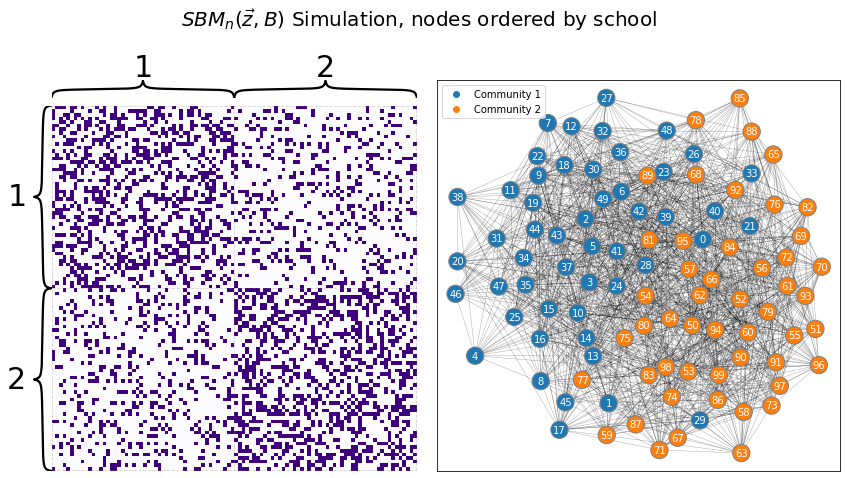

In [2]:
from graphbook_code import draw_multiplot
import matplotlib.pyplot as plt

draw_multiplot(A, labels=zs, title="$SBM_n(\\vec z, B)$ Simulation, nodes ordered by school");

Remember in the two-block SBM, that we have the following block matrix:
\begin{align*}
    B &= \begin{bmatrix}
        b_{11} & b_{12} \\ b_{21} & b_{22}
    \end{bmatrix}
\end{align*}

The network is undirected by construction, so by definition, $b_{21} = b_{12}$. But what about the other entries to the block matrix? It seems pretty clear that the on-diagonal blocks have a different probability than the off-diagonal blocks, so perhaps it seems reasonable to conclude that $b_{11}, b_{22} \neq b_{12}, b_{21}$. But what about the on-diagonal blocks? What can we say about the relationship between $b_{11}$ and $b_{22}$? To begin to perform inference on $B$, we need a community assignment vector $\vec z$, which was the vector whose entries $z_{i}$ indicate which of the $K$ communities the node $i$ is part of. For the purposes of this section, we will assume that we are either handed the community assignment vector $\vec z$ with our sample, or we have estimated it using community detection, as we explored in the [preceding section](#link?). Next, we use the community assignment vector (or the estimated community assignment vector, $\hat{\vec z}$) to produce an estimate of the block matrix, $\hat B$:

In [3]:
from graphbook_code import SBMEstimator

sbm_mod = SBMEstimator(directed=False, loops=False)
sbm_mod.fit(A, zs)
Bhat = sbm_mod.block_p_

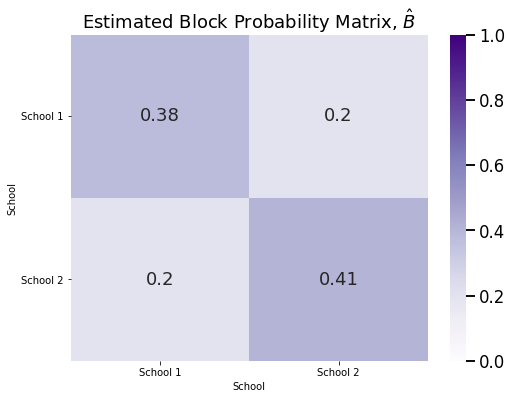

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_block(X, title="", blockname="School", blocktix=[0.5, 1.5],
               blocklabs=["School 1", "School 2"]):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1, annot=True)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=blockname, xlabel=blockname)
        ax.set_yticks(blocktix)
        ax.set_yticklabels(blocklabs)
        ax.set_xticks(blocktix)
        ax.set_xticklabels(blocklabs)
        cbar.ax.set_frame_on(True)
    return

plot_block(Bhat, title="Estimated Block Probability Matrix, $\\hat B$")

Next, we assemble the following statistical models:
1. The network is Erdos-Renyi: the simplest possible model would be the model where all of the block probabilities are the same; that is, $b_{11} = b_{12} = b_{21} = b_{22}$. This is equivalent to an Erdos-Renyi random network with probability $a$, $ER_n(a)$. This doesn't seem totally reasonable based on the estimated block probability matrix we see above, but it is better to ask questions to see whether something else is better supported by the data than it is to make outright assumptions. For this reason, we will let the null hypothesis $H_0 : b_{11} = b_{12} = b_{21} = b_{22} = a$. This can be encoded in graspologic using the string, `"aaaa"`, or that all four entries of the four-block matrix $B$ are the same value, $a$. It is typically the case when testing statistical models to let the null hypothesis $H_0$ be that the network is Erdos-Renyi.
2. Planted partition: As we discussed above, the planted partition model is the model where $b_{11} = b_{22} = a$, but $b_{21} = b_{12} = b$, where $a \neq b$. The within-community edges share a common probability $a$, and the between-community edges share a common probability $b$ which is distinct from $a$. The corresponding hypothesis is indicated by $H_1 : b_{11} = b_{22} = a, b_{12} = b_{21} = b, a \neq b$. This hypothesis can be encoded in graspologic using the string, `"abba"`.
3. Symmetric Heterogeneous: as discussed above, the symmetric heterogeneous model is the moddel where $b_{12} = b_{21}$; that is, the block matrix $B$ is symmetric. However, there is heterogeneity in the within-community block probabilities; that is, $b_{11} = a$, but $b_{22} = c$, where $a \neq c$. this hypothesis is encoded in graspologic using the string, `"abbc"`.

## Multiple Hypothesis Correction ensures the $p$-value we obtain is accurate

When performing multiple statistical tests, we run into the multiple hypothesis correction problem. Let's imagine that we have $5000$ coins, and each of these coins has a true probability of landing on heads of $0.5$. We flip each coin $500$ times, and for each coin $i$, we estimate the probability that the coin lands on heads by just counting the number of heads and dividing by $50$. For each coin, we want to test whether the probability that the coin lands on heads is different from $0.5$. In symbols, we want to test $H_{0}^{(i)} : p_i = 0.5$ against $H_{A}^{(i)}: p_i \neq 0.5$. We choose to use the Binomial test as our statistical test, which we learned about in the section on [one-sample testing](#link?). The below visualization shows the $p$-values of the $5000$ tests as a histogram, where the bar-height indicates the fraction of $p$-values which fall in the indicated range:

In [11]:
import numpy as np
from graspologic.simulations import er_np
import seaborn as sns
from scipy.stats import binom_test

ncoins = 5000 # the number of networks
p = 0.5  # the true probability
n = 500  # the number of flips

# the number of heads from each experiment
experiments = np.random.binomial(n, p, size=ncoins)

# perform binomial test to see if the number of heads we obtain supports that the
# true probabiily is 0.5
pvals = [binom_test(nheads_i, n, p=p) for nheads_i in experiments]

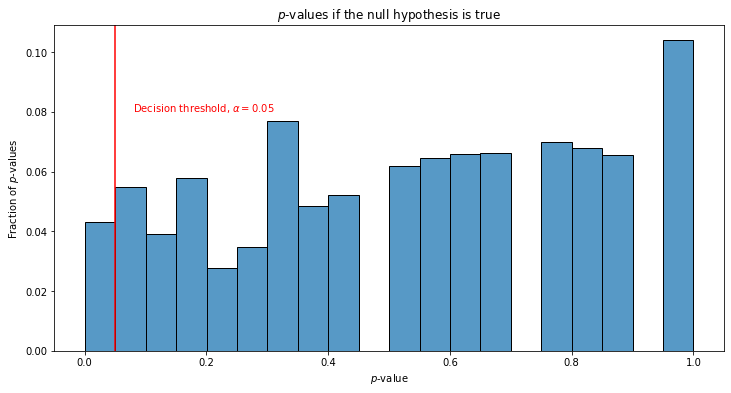

In [12]:
import pandas as pd

real_df = pd.DataFrame(pvals, columns=["pval"])

fig, ax = plt.subplots(1,1, figsize=(12, 6))
sns.histplot(real_df, x="pval", stat="probability",
            ax=ax, common_norm=False, binwidth=.05)
ax.set_ylabel("Fraction of $p$-values");
ax.set_xlabel("$p$-value");
ax.set_title("$p$-values if the null hypothesis is true");
ax.axvline(0.05, color="red")
ax.text(.08, .08, "Decision threshold, $\\alpha = 0.05$", color="red");

In general, we will correctly reject the alternative hypothesis, and accept the null hypothesis. This is great, since $p_i$ is, in fact, $0.5$ as specified by the null hypothesis $H_{0}^{(i)}$. However, we notice something particularly strange: For a portion of the tests, we are, in-fact, *wrong*. We obtain many $p$-values which are under our decision threshold of $\alpha = 0.05$, and would incorrectly report that the alternative hypothesis is correct, and $p_i$ is *not* $0.5$. This is wrong, and extremely problematic! Remember that the $p$-value was defined as the probability that the null hypothesis (here, that $p_i = 0.5$) would be incorrectly rejected in favor of the alternative hypothesis (here, that $p_i \neq 0.5$). In fact, if the null hypothesis were true, we would expect to see $p$-values of at most $\alpha$ being reported about $\alpha$ of the time (this assumes all of the coins are independent, but even when they are not all independent, we still obtain a similarly shocking conclusion). This means that with $n=5000$ tests and $\alpha = 0.05$, we would expect to be wrong about $n\cdot \alpha = 50$ times.

As practicians, it feels like it would be pretty problematic to report an analysis and know that an arbitrary fraction of your conclusions are wrong just by random chance. For this reason, a focus of statistics in recent decades has been the development of methods which, in effect, *inflate* the $p$-values based on the number of tests that we perform, so that we run into this issue at much lower rate than $\alpha$ of the time. These strategies are collectively known as **multiple comparisons adjustments**. We won't go into too many details with how multiple comparisons adjustments are performed, but in general given a list of $p$-values `pvals`, you can adjust the $p$-values using the `multipletests()` method from `statsmodels`. This will give you protection for this "multiple comparisons" issue in your analyses. 

There are a variety of ways to do this, but in general, we will resort to something which preserves the [familywise error rate](https://en.wikipedia.org/wiki/Family-wise_error_rate). What this means is that, after adjustment using a method which preserves the familywise error rate and using $\alpha$ as the *decision threshold*, that there is an $\alpha$ chance that *at least* one of our decisions is *wrong*. These methods include the Bonferroni procedure and the Holm-Bonferroni procedure. Another popular choice is called controlling the [false discovery rate](https://en.wikipedia.org/wiki/False_discovery_rate) which we will not discuss here. 

Let's see what happens when we adjust our $p$-values here:

In [13]:
from statsmodels.stats.multitest import multipletests

alpha = 0.05  # the desired alpha of the test
_, adj_pvals, _, _ = multipletests(pvals, alpha=alpha, method="holm")

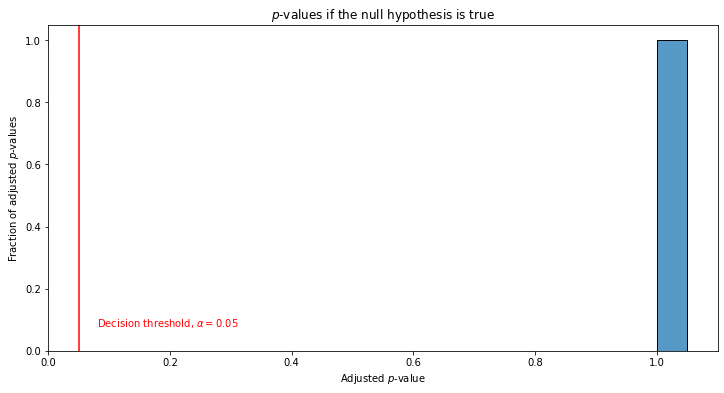

In [14]:

real_df = pd.DataFrame(adj_pvals, columns=["pval"])

fig, ax = plt.subplots(1,1, figsize=(12, 6))
sns.histplot(real_df, x="pval", stat="probability",
            ax=ax, common_norm=False, binwidth=.05)
ax.set_ylabel("Fraction of adjusted $p$-values");
ax.set_xlabel("Adjusted $p$-value");
ax.set_title("$p$-values if the null hypothesis is true");
ax.axvline(0.05, color="red")
ax.text(.08, .08, "Decision threshold, $\\alpha = 0.05$", color="red");

After adjusting for multiple comparisons, we end up with all of the $p$-values being $1$. Therefore, we *never* incorrectly reject the null hypothesis anymore.

In general, for multiple hypothesis correction, we recommend using Holm-Bonferroni correction, which is encoded with the parameter `multitest_method="holm"`. We recommend the use of the Holm-Bonferroni approach because it ensures that our $p$-value produced by using multiple statistical tests controls the [Family-Wise Error Rate (FWER)](https://en.wikipedia.org/wiki/Family-wise_error_rate) with no requirements as to the problem we glossed over previously, the *dependence* of the hypotheses being tested. This may give us adjusted $p$-values that are a little higher than several other methods (such as the popular Benjamini-Hochberg procedure), but in general we prefer to err on the side of caution when reporting scientific discoveries and do *not* want to spend effort investigating hypothetical dependencies amongst our hypothesis tests.

### Model Selection for unweighted networks

Finally, to implement the actual hypothesis test, the procedure will be to estimate a test statistic and $p$-value using our procedure of choice, for each of the possible alternative hypotheses (the hypotheses $H_1, H_2, ..., H_n$, depending on how many hypotheses we have). If any of the adjusted $p$-values which we produce are smaller than our decision threshold of $\alpha = 0.05$, we accept the hypothesis with the smallest $p$-value. If none of the adjusted $p$-values we produce our smaller than our decision threshold, we accept the null hypothesis $H_0$. `graspologic` makes this implementation easy for us:

In [ ]:
alt_hypotheses = ['abba', 'abbd']
pval, opt_structure = sbm_mod.estimate_block_structure(A, np.array(zs), candidates = alt_hypotheses,
                                 test_method = "fisher_exact", multitest_method = "holm", alpha=.05)

print("p-value: {:.3f}, optimal-structure: {:s}".format(pval, opt_structure))

So, the model correctly reports that $H_1$ is true with $\alpha = 0.05$, and the optimal block structure is reported as $H_1: b_{11} = b_{22} = b, b_{12} = b_{21} = a, a \neq b$. The adjusted $p$-value is approximately $.002$.
